# Collaboration and Competition

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.36 which is incompatible.
jupyter-console 6.4.3 has requirement jupyter-client>=7.0.0, but you'll have jupyter-client 5.2.4 which is incompatible.


The environment is already saved in the Workspace and can be accessed at the file path provided below. 

In [2]:
from unityagents import UnityEnvironment
import numpy as np

env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.65278625 -1.5        -0.          0.
  6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [5]:
for i in range(5):                                         # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    j=0
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        j += 1
        if np.any(dones):                                  # exit loop if episode finished
            break
    print(j)
    print(scores)
    print('Total score (averaged over agents) this episode: {}'.format(np.max(scores)))

30
[-0.01  0.1 ]
Total score (averaged over agents) this episode: 0.10000000149011612
31
[ 0.    0.09]
Total score (averaged over agents) this episode: 0.09000000171363354
14
[ 0.   -0.01]
Total score (averaged over agents) this episode: 0.0
14
[ 0.   -0.01]
Total score (averaged over agents) this episode: 0.0
15
[ 0.   -0.01]
Total score (averaged over agents) this episode: 0.0


When finished, you can close the environment.

In [6]:
# env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

In [14]:
%reload_ext ddpg_agent
%reload_ext model
from ddpg_agent import Agent
agent = Agent(state_size=48, action_size=2*2, num_agents=1, random_seed=2)

In [17]:
from collections import deque
import torch
import matplotlib.pyplot as plt
%matplotlib inline

def ddpg(n_episodes=2000, max_t=100000, print_every=100):
    scores_deque = deque(maxlen=print_every)
    scores = []
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations
        state = state.reshape(1,48)
        agent.reset()
        score = np.zeros(num_agents)
        for t in range(max_t):
            action = agent.act(state)
            env_info = env.step(action)[brain_name]           # send all actions to tne environment
            next_state = env_info.vector_observations       # get next state (for each agent)
            next_state = next_state.reshape(1,48)
            reward = env_info.rewards                         # get reward (for each agent)
            done = env_info.local_done
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if np.any(done):
                break 
        scores_deque.append(np.max(score))
        scores.append(np.max(score))
        print('\rEpisode {}\tAverage Score: {:.4f}\tEpsilon:{:.4f}'.format(i_episode, np.mean(scores_deque), agent.eps), end="")
        if np.mean(scores_deque) > 0.5:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.4f}\tEpsilon:{:.4f}'.format(i_episode, np.mean(scores_deque), agent.eps))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            break
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.4f}\tEpsilon:{:.4f}'.format(i_episode, np.mean(scores_deque), agent.eps))
            
    return scores

Episode 100	Average Score: 0.0009	Epsilon:0.9950
Episode 200	Average Score: 0.0030	Epsilon:0.9900
Episode 300	Average Score: 0.0242	Epsilon:0.9801
Episode 400	Average Score: 0.0422	Epsilon:0.9655
Episode 500	Average Score: 0.0563	Epsilon:0.9559
Episode 600	Average Score: 0.0648	Epsilon:0.9416
Episode 700	Average Score: 0.0891	Epsilon:0.9229
Episode 800	Average Score: 0.0982	Epsilon:0.9046
Episode 900	Average Score: 0.0976	Epsilon:0.8822
Episode 1000	Average Score: 0.1048	Epsilon:0.8647
Episode 1100	Average Score: 0.1253	Epsilon:0.8391
Episode 1200	Average Score: 0.1597	Epsilon:0.8102
Episode 1300	Average Score: 0.2083	Epsilon:0.7783
Episode 1400	Average Score: 0.2412	Epsilon:0.7403
Episode 1500	Average Score: 0.2151	Epsilon:0.7076
Episode 1600	Average Score: 0.3613	Epsilon:0.6564
Episode 1700	Average Score: 0.4129	Epsilon:0.6058
Episode 1800	Average Score: 0.3886	Epsilon:0.5619
Episode 1858	Average Score: 0.5169	Epsilon:0.5238
Environment solved in 1858 episodes!	Average Score: 0.5169	

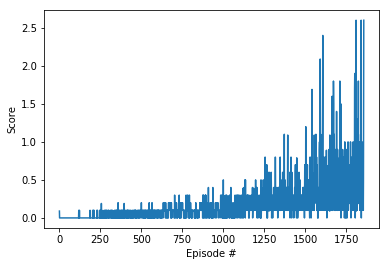

In [18]:
scores = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.savefig('scores_vs_episodes.jpg')
plt.show()

In [ ]:
# Episode 100	Average Score: 0.0029	Epsilon:0.995
# Episode 200	Average Score: 0.0069	Epsilon:0.990025
# Episode 300	Average Score: 0.0208	Epsilon:0.9801495006250001
# Episode 400	Average Score: 0.0590	Epsilon:0.9655206468094844
# Episode 500	Average Score: 0.1004	Epsilon:0.9463545798134439
# Episode 600	Average Score: 0.1012	Epsilon:0.9275689688183278
# Episode 700	Average Score: 0.1241	Epsilon:0.9046104802746175
# Episode 800	Average Score: 0.1314	Epsilon:0.8778091417340573
# Episode 900	Average Score: 0.1534	Epsilon:0.8518018596003477
# Episode 1000	Average Score: 0.2233	Epsilon:0.810157377815473

In [ ]:
# Episode 100	Average Score: 0.2283	Epsilon:0.7744209942832988
# Episode 200	Average Score: 0.2190	Epsilon:0.7402609576967045
# Episode 300	Average Score: 0.2679	Epsilon:0.7005493475733617
# Episode 400	Average Score: 0.3634	Epsilon:0.6530732019446993
# Episode 471	Average Score: 0.5040	Epsilon:0.6088145090359074
# Environment solved in 471 episodes!	Average Score: 0.5040	Epsilon:0.6088145090359074

In [31]:
# Episode 100	Average Score: 0.2243
# Episode 200	Average Score: 0.2235
# Episode 300	Average Score: 0.2465
# Episode 400	Average Score: 0.2330
# Episode 500	Average Score: 0.2299
# Episode 600	Average Score: 0.2206
# Episode 700	Average Score: 0.2345
# Episode 800	Average Score: 0.2317
# Episode 900	Average Score: 0.2589
# Episode 1000	Average Score: 0.2039
# Episode 1100	Average Score: 0.2258
# Episode 1200	Average Score: 0.2419
# Episode 1300	Average Score: 0.2589
# Episode 1400	Average Score: 0.2539
# Episode 1500	Average Score: 0.2438
# Episode 1600	Average Score: 0.2539
# Episode 1700	Average Score: 0.2398
# Episode 1800	Average Score: 0.2569
# Episode 1900	Average Score: 0.2327
# Episode 2000	Average Score: 0.2234
# Episode 2100	Average Score: 0.2520
# Episode 2200	Average Score: 0.2680
# Episode 2300	Average Score: 0.2520
# Episode 2400	Average Score: 0.2448
# Episode 2500	Average Score: 0.2408
# Episode 2600	Average Score: 0.2399
# Episode 2700	Average Score: 0.2359
# Episode 2800	Average Score: 0.2139
# Episode 2900	Average Score: 0.2529
# Episode 3000	Average Score: 0.2239

In [16]:
agent.eps

0.00998645168764533

In [ ]:
print('\rEpisode: {}\tMax Reward: {:2.3f}\tAverage (Max) Reward: {:2.3f}'.format(i_episode, np.max(scores),
                                                                                        average_score), end="")